## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Resources/Mouse_metadata copy.csv"
study_results = "Resources/Study_results copy.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

mouse_study=pd.merge(mouse_metadata,study_results,on=['Mouse ID','Mouse ID'], how='left')
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean=mouse_study.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']

median=mouse_study.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']

variance=mouse_study.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']

sd=mouse_study.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']

SEM=mouse_study.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

Summary_Regimen=pd.DataFrame({'Average':mean,
                            'Median': median,
                            'Variance': variance,
                            'Standard Deviation':sd,
                            'Standard Error': SEM})

Summary_Regimen

,Average,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Data Points by Drug')

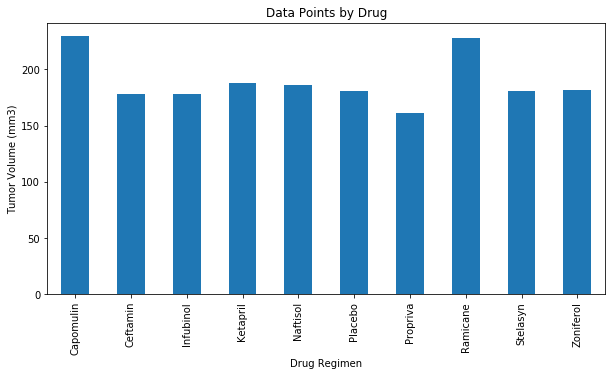

In [6]:
# Generate a bar plot showing number of data points of tumor volume for each treatment regimen using pandas
#hint use count 
data_points=mouse_study.groupby(['Drug Regimen']).count()['Tumor Volume (mm3)']
data_points.plot(kind='bar',figsize=(10,5))
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Data Points by Drug')

Text(0.5, 1.0, 'Data Points by Drug')

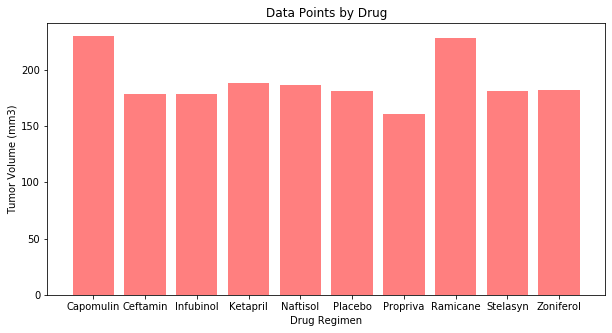

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=list(data_points.index.values.tolist())
x_ticks=[value for value in data_points]
plt.figure(figsize=(10,5))
plt.bar(x_axis,data_points,color='r', alpha=0.5, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Data Points by Drug')

## Pie plots

(-1.105172849624489,
 1.1027130801595115,
 -1.1045613723658971,
 1.1002172082078998)

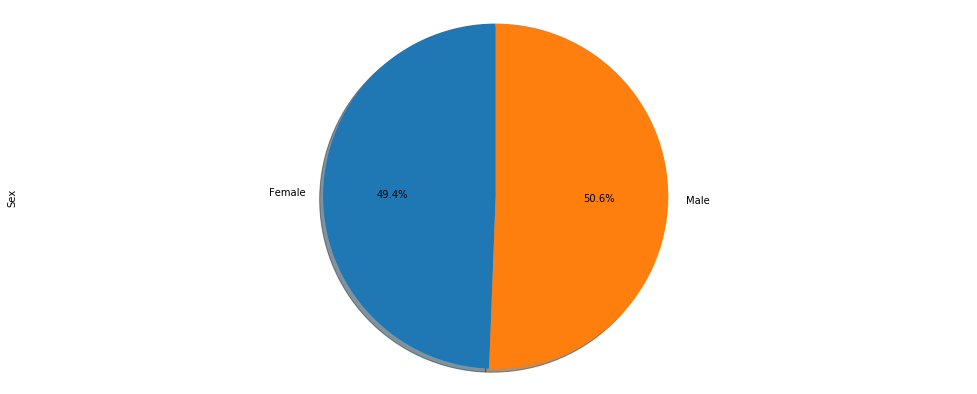

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group=mouse_study.groupby('Sex')
count_sex=sex_group['Sex'].count()

count_sex.plot(kind='pie', figsize=(17,7),autopct="%1.1f%%",shadow=True,startangle=90)
plt.axis('equal')

(-1.105172849624489,
 1.1027130801595115,
 -1.1045613723658971,
 1.1002172082078998)

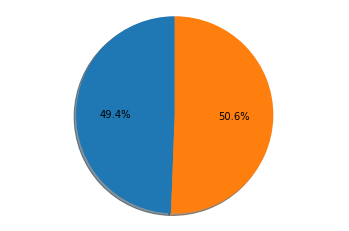

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(count_sex,autopct="%1.1f%%", shadow=True, startangle=90,)
plt.axis('equal')

## Quartiles, outliers and boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Drug Regimen Ramicane, Capomulin, Infubinol, Ceftamine, are the most promising 

four_drugs=mouse_study.loc[(mouse_study['Drug Regimen']=='Ramicane')|(mouse_study['Drug Regimen']=='Capomulin')|(mouse_study['Drug Regimen']=='Infubinol')|(mouse_study['Drug Regimen']=='Ceftamine'),:]
tumor_group=four_drugs.groupby(['Mouse ID']).sum()['Tumor Volume (mm3)']

quartiles = tumor_group.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The interquartile range of temperatures is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of temperatures is: 82.36320204999993
Values below 223.41092228500008 could be outliers.
Values above 552.8637304849998 could be outliers.


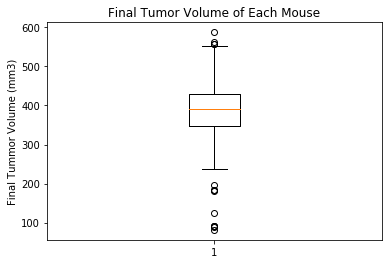

In [130]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse')
ax1.set_ylabel('Final Tummor Volume (mm3)')
ax1.boxplot(tumor_group)
plt.show()

## Line and scatter plots

Text(0.5, 1.0, 'Average Tumor Volume per Timepoint')

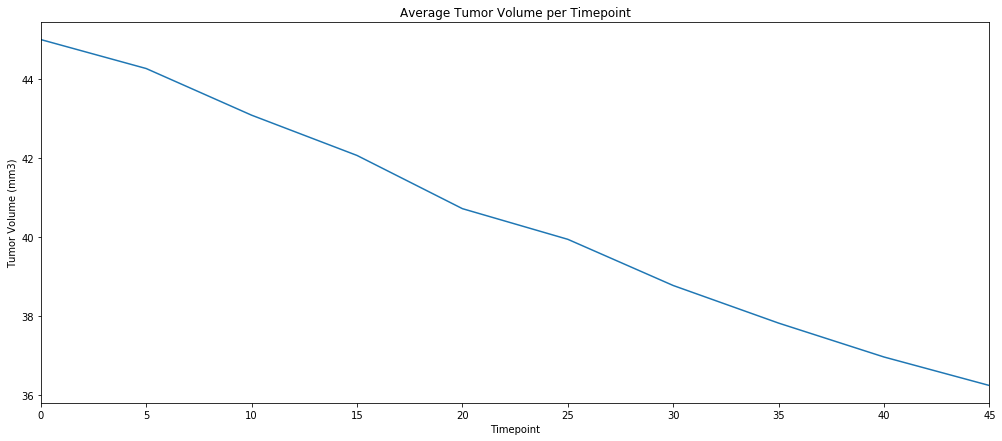

In [155]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Cap_df=mouse_study.loc[(mouse_study['Drug Regimen']=='Capomulin'),:]
Cap_df=Cap_df.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']
Cap_df.plot(kind='line', figsize=(17,7))
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume per Timepoint')

Text(0.5, 1.0, 'Mouse Weight vs Tumor Volume')

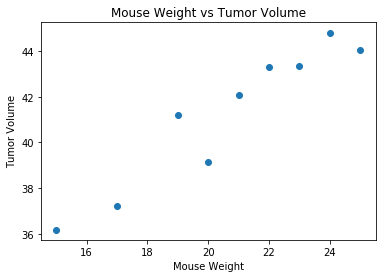

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Tumor_Weight=mouse_study.loc[(mouse_study['Drug Regimen']=='Capomulin'),:]
Tumor_Weight=Tumor_Weight.groupby(['Weight (g)']).mean()['Tumor Volume (mm3)']
Tumor_Weight_df=pd.DataFrame({'Tumor Volume':Tumor_Weight})
x_axis=list(Tumor_Weight.index.values.tolist())
x_values=[value for value in x_axis]
y_values = Tumor_Weight_df ['Tumor Volume']
plt.scatter(x_axis, y_values)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title('Mouse Weight vs Tumor Volume')

In [21]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
Tumor_Weight=mouse_study.loc[(mouse_study['Drug Regimen']=='Capomulin'),:]
Tumor_Weight=Tumor_Weight.groupby(['Mouse ID','Weight (g)']).mean()['Tumor Volume (mm3)']
Tumor_Weight_df=pd.DataFrame({'Tumor Volume':Tumor_Weight})
Tumor_Weight_df
x_axis=np.arange(len(Tumor_Weight_df))
y_values = Tumor_Weight_df ['Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_values)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_axis,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'The Linear Regression Model is {line_eq}')

The correlation between both factors is -0.25
The Linear Regression Model is y = -0.11x + 42.1
